## Introduction to Neural Networks - Fraud Detection

Nilson reports that U.S. card fraud (credit, debt, etc) was reportedly 9 billion dollars in 2016 and expected to increase to 12 billion dollars by 2020. For perspective, in 2017 both PayPal's and Mastercard's revenue was only $10.8 billion each.


**Objective:** In this session, given the credit card transactions, we will build a simple neural network (i.e., Multilayer perceptrons) for Fraud Detection using Keras.

This notebooks covers,

1. Creating a Model

2. Adding Layers

3. Activations

4. Optimizers and Loss functions

5. Evaluation

### Dataset Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

#### Process flow for building Neural Networks using Tensor Flow + Keras

Step 1. Read the data

Step 2. Clean and prepare the data. Ensure data is scaled

Step 3. Create a train test split - 70:30 or 80:20

Step 4. Using the training data we need to start building a model. First create an empty sequence using Sequential(layers=None, name=None). This shows that layers are not added yet

Step 5. Add layers using the Dense function. As in when you add the layers, you need to specify the number of neurons and the activation function

Step 6. Now compile the model using one of the compilers, which could be ADAM, SGB, etc.

Step 7. Specify the loss function and accuracy metrics

Step 8. Fit the model on the data and check accuracy score on test data

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

import seaborn as sns


In [3]:
from tensorflow import keras

In [4]:
import random as rn

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
PYTHONHASHSEED=0

In [6]:
tf.random.set_seed(1234)
np.random.seed(1234)
rn.seed(1254)

In [ ]:
# from tensorflow.keras import backend as K

# session_conf = tf.ConfigProto(
#       intra_op_parallelism_threads=1,
#       inter_op_parallelism_threads=1)

# #Force Tensorflow to use a single thread
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)

# K.set_session(sess)

In [7]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data EDA (Exploratory Data Analysis)
The Exploratory Data Analysis involves understanding features, spread and other descriptive statistics of the data

In [8]:
credit_data=raw_df.copy()

In [9]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
credit_data = credit_data.drop("Time", axis = 1)

In [11]:
credit_data['Amount'].describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

***Findings:*** Note that the column amount has a different scale when compared to other columns which are a product of Principal Component have different scales. The dependent variable Class is highly imbalanced.

In [12]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

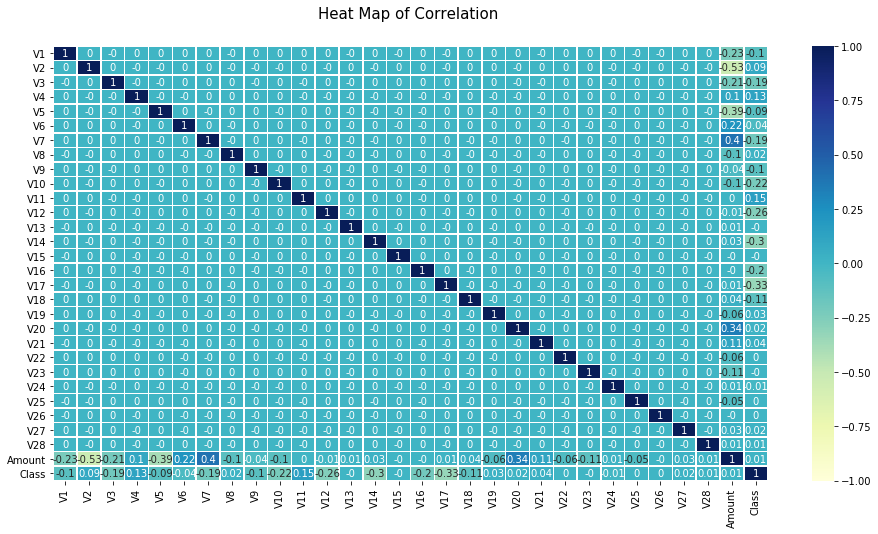

In [13]:
#---------------------------------------Getting Correlation Data----------------------------------------
corr_data = credit_data.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(corr_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

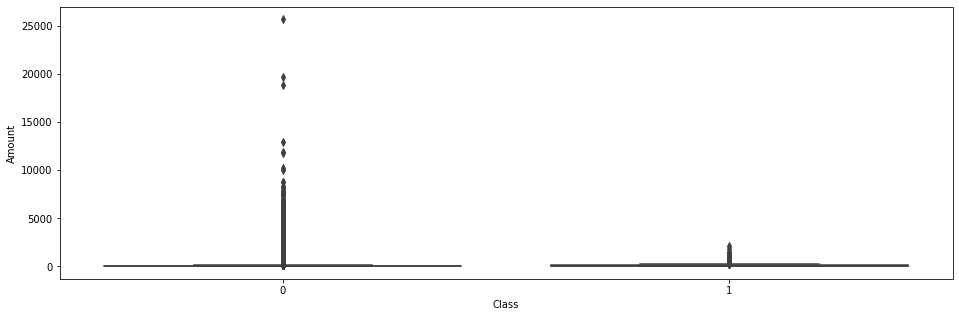

In [19]:
fig, ax = plt.subplots(figsize=(16,5));
sns.boxplot(y='Amount', x='Class', data=credit_data[['Amount','Class']]);

In [20]:
X_data = credit_data.iloc[:, :-1]

In [21]:
X_data.shape

(284807, 29)

In [22]:
X_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
y_data = credit_data.iloc[:, -1]

In [24]:
y_data.shape

(284807,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

#### Data Scaling

***Note:*** Amount and the PCA variables were using different scales, hence the dataset is normalized. Also note that normalization plays an important role in gradient descent. Convergence is much faster on Normalized Data.

In [26]:
X_train = preprocessing.normalize(X_train)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


### Creating a model

Keras model object can be created with Sequential class. Sequential groups a linear stack of layers into a tf.keras.Model. At the outset, the model is empty per se. It is completed by adding additional layers and compilation


### Adding layers [layers and activations]

Keras layers can be added to the model. A Dense is a fully connected layer in Tensor flow (and other programs such as Keras). What this means is that every Neuron in a Dense layer will be fully connected to every Neuron in the prior layer.

***Note:***
It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

***More about weight Initializer***
https://keras.io/api/layers/initializers/

tf.keras.layers.Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)

***Inputs to the Dense Function***
1. units - Positive integer, dimensionality of the output space.
2. activation - Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
3. use_bias - Boolean, whether the layer uses a bias vector.
4. kernel_initializer - Initializer for the kernel weights matrix.
5. bias_initializer - Initializer for the bias vector.
6. kernel_regularizer - Regularizer function applied to the kernel weights matrix.
7. bias_regularizer - Regularizer function applied to the bias vector.
8. activity_regularizer - Regularizer function applied to the output of the layer (its "activation").
9. kernel_constraint - Constraint function applied to the kernel weights matrix.
10. bias_constraint - Constraint function applied to the bias vector.

#### What could be the optimum number of neurons and hidden layers to start with

https://www.heatonresearch.com/2017/06/01/hidden-layers.html#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.

1. The number of hidden neurons can be between the size of the input layer and the size of the output layer.
2. The number of hidden neurons can be 2/3 the size of the input layer, plus the size of the output layer.
3. The number of hidden neurons can be less than twice the size of the input layer.

***Number of Hidden Layers***

 1 - Can approximate any function that contains a continuous mapping
from one finite space to another.

 2 - Can represent an arbitrary decision boundary to arbitrary accuracy
with rational activation functions and can approximate any smooth
mapping to any accuracy.

In [28]:
model = Sequential(layers=None, name=None) #Default property of Sequential() is to have no layers
model.add(Dense(10, input_shape = (29,), activation = 'tanh'))
model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

### Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training. Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.

Types of loss (function) and optimizer should be designated


***More about Optimizers***

https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

***Adadelta:***

Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:

- The continual decay of learning rates throughout training
- The need for a manually selected global learning rate

Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. In this version, initial learning rate can be set, as in most other Keras optimizers.


***Stochastic Gradient Descent:***

It’s a variant of Gradient Descent. It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of one time as in Gradient Descent.


***Adagrad:***

One of the disadvantages of all the optimizers explained is that the learning rate is constant for all parameters and for each cycle. This optimizer changes the learning rate. It changes the learning rate ‘η’ for each parameter and at every time step ‘t’. It’s a type second order optimization algorithm. It works on the derivative of an error function.


***ADAM:***

Adam (Adaptive Moment Estimation) works with momentums of first and second order. The intuition behind the Adam is that we don’t want to roll so fast just because we can jump over the minimum, we want to decrease the velocity a little bit for a careful search. In addition to storing an exponentially decaying average of past squared gradients like AdaDelta, Adam also keeps an exponentially decaying average of past gradients M(t). M(t) and V(t) are values of the first moment which is the Mean and the second moment which is the uncentered variance of the gradients respectively.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

<img src="OPT1.gif" style="width:400;height:400;"> <img src="OPT1.gif" style="width:400;height:400;">

***Compile the model***
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
2. Optimizer —This is how the model is updated based on the data it sees and its loss function.
3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [29]:
sgd = optimizers.Adam(lr = 0.001)

In [30]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

### Summary of the model

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


#### Let's try and understand the output above (Output explanation is using two layers):


1. We have created a neural network with one input, two hidden, and an output layer
2. The input layer has 29 variables and 10 neurons. So the Weight matrix will be of shape 10 x 29 and the bias matrix is of shape 10 x 1
3. Total number of Parameters in layer 1 = 10 x 29 + 10 x 1 = 300
4. The first layer has 64 output values using relu as the activation function. The second layer has 5 neurons and works with 10 inputs, hence the weight matrix is 5 x 10 and the bias matrix is 5 x 1
5. Total Parameters in layer 2 = 5 x 10 + 5 x 1 = 55
6. Finally, the output layer has one neuron but it has 5 different inputs from the hidden layer 2 and has a bias term, hence number of neurons = 5+1=6


### Training [Forward pass and Backpropagation]

Training the model

In [40]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [41]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [42]:
model.fit(X_train, y_train.values, batch_size = 2000, epochs = 20, verbose = 1, callbacks=[tensorboard_cb])
# ,validation_split=0.20

Epoch 1/20
114/114 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9989
Epoch 2/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9989
Epoch 3/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9989
Epoch 4/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9989
Epoch 5/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9989
Epoch 6/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9989
Epoch 7/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9989
Epoch 8/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9989
Epoch 9/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9989
Epoch 10/20
114/114 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9989

In [44]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 68088), started 0:01:05 ago. (Use '!kill 68088' to kill it.)

### Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list



In [33]:
X_test = preprocessing.normalize(X_test)

In [34]:
results = model.evaluate(X_test, y_test.values)

1781/1781 [==============================] - 1s 614us/step - loss: 0.0086 - accuracy: 0.9989


In [35]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.008588538505136967, 0.9988588690757751]


In [36]:
resultsDf = pd.DataFrame({'Iteration': None, 'Method':['Adam - Check '], 'Log Loss': results[0], 'Accuracy': results[1]})
resultsDf = resultsDf[['Iteration', 'Method', 'Log Loss', 'Accuracy']]
resultsDf

,Iteration,Method,Log Loss,Accuracy
0,None,Adam - Check,0.008589,0.998859


### Confusion Matrix

In [37]:
Y_pred_cls = model.predict_classes(X_test, batch_size=2000, verbose=0)

print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))

print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))

print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1781/1781 [==============================] - 1s 647us/step - loss: 0.0086 - accuracy: 0.9989
Accuracy Model1 (Dropout): 0.9988588690757751
Recall_score: 0.43
Precision_score: 0.8431372549019608
F-score: 0.5695364238410596


array([[56854,     8],
       [   57,    43]], dtype=int64)

In [38]:
model.save("my_keras_model.h5")

#### Hyper Tunning Model Parameters

In [94]:
from tensorflow.keras import models
# from tensorflow.keras import InputLayer

In [110]:
def build_model(n_hidden_layer=1, n_neurons=10, input_shape=29):
    
    # create model
    model = Sequential()
    model.add(Dense(10, input_shape = (29,), activation = 'tanh'))

    
    
    for layer in range(n_hidden_layer):
        model.add(Dense(n_neurons, activation="tanh"))

    
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile model
    

    model.compile(optimizer ='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])
    
    return model

In [111]:
from sklearn.base import clone
 
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = build_model,nb_epoch = 100,
                            batch_size=10)
clone(keras_class)

In [112]:
keras_class.fit(X_train, y_train.values)

22785/22785 [==============================] - 18s 803us/step - loss: 0.0097 - accuracy: 0.9983


In [114]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden_layer": [1, 2, 3],
    "n_neurons": [20, 30],
#     "learning_rate": reciprocal(3e-4, 3e-2),
#     "opt":['Adam']
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train, y_train.values, epochs=5)

Epoch 1/5
15190/15190 [==============================] - 15s 994us/step - loss: 0.0093 - accuracy: 0.9987
Epoch 2/5
15190/15190 [==============================] - 17s 1ms/step - loss: 0.0057 - accuracy: 0.9989
Epoch 3/5
15190/15190 [==============================] - 15s 1ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 4/5
15190/15190 [==============================] - 15s 997us/step - loss: 0.0048 - accuracy: 0.9990
Epoch 5/5
7595/7595 [==============================] - 6s 741us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 1/5
15190/15190 [==============================] - 15s 1ms/step - loss: 0.0094 - accuracy: 0.9988
Epoch 2/5
15190/15190 [==============================] - 15s 1ms/step - loss: 0.0055 - accuracy: 0.9990
Epoch 3/5
15190/15190 [==============================] - 15s 988us/step - loss: 0.0047 - accuracy: 0.9990
Epoch 4/5
15190/15190 [==============================] - 15s 982us/step - loss: 0.0044 - accuracy: 0.9991
Epoch 5/5
7595/7595 [==============================] - 7s

15190/15190 [==============================] - 24s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
7595/7595 [==============================] - 9s 1ms/step - loss: 0.0043 - accuracy: 0.9992
Epoch 1/5
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0081 - accuracy: 0.9988
Epoch 2/5
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0049 - accuracy: 0.9991
Epoch 3/5
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0043 - accuracy: 0.9992
Epoch 4/5
15190/15190 [==============================] - 22s 1ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 5/5
7595/7595 [==============================] - 8s 1ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 1/5
15190/15190 [==============================] - 25s 2ms/step - loss: 0.0076 - accuracy: 0.9987
Epoch 2/5
15190/15190 [==============================] - 26s 2ms/step - loss: 0.

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013F1282F288>,
                   param_distributions={'n_hidden_layer': [1, 2, 3],
                                        'n_neurons': [20, 30]})

In [115]:
rnd_search_cv.best_params_


{'n_neurons': 30, 'n_hidden_layer': 3}

#### Optional - Understanding Loss function w.r.t to multiple optimizer over multiple iteration

*** Update the number of neurons, shape and activation function under the create_model() function based on what you used before ***

In [116]:
def create_model(opt):
    
    # create model
    model = Sequential(layers=None, name=None)
    model.add(Dense(10, input_shape = (29,), activation = 'tanh'))
    model.add(Dense(5, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile model
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
    
    return model

*** Add a list of optimizers in the optimizer list below, e.g. optimizer=['Adam', 'SGD'] etc.***

In [117]:
optimizer=['Adam','SGD']

In [118]:
for j in range(1,11):
    
    print("Iteration:",j)
    
    for i in optimizer:
        
        mod=create_model(i)
#         print("Model:",i,end=' ')
        mod.fit(X_train, y_train.values, batch_size = 700, epochs = j, verbose = 0)
        results = mod.evaluate(X_test, y_test.values, verbose=0)
        #print(mod.metrics_names)
#         print(results)
        
        tempResultsDf = pd.DataFrame({'Iteration': j, 'Method':[i], 'Accuracy': results[1], 'Log Loss': results[0]})
        resultsDf = pd.concat([resultsDf, tempResultsDf])
        resultsDf = resultsDf[['Iteration', 'Method', 'Accuracy', 'Log Loss']]
#         resultsDf

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


In [119]:
resultsDf=resultsDf[resultsDf['Iteration']>0]
resultsDf

,Iteration,Method,Accuracy,Log Loss
0,1,Adam,0.998244,0.046188
0,1,SGD,0.998244,0.090253
0,2,Adam,0.998578,0.017250
0,2,SGD,0.998244,0.041868
0,3,Adam,0.998683,0.015381
0,3,SGD,0.998244,0.025408
0,4,Adam,0.998789,0.012305
0,4,SGD,0.998244,0.025776
0,5,Adam,0.998841,0.011231
0,5,SGD,0.998244,0.024537


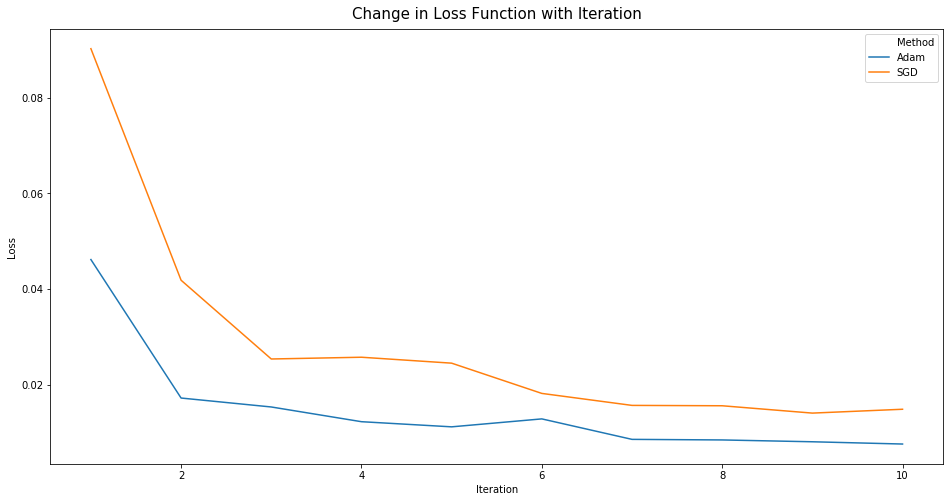

In [120]:
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Change in Loss Function with Iteration', fontsize=15, pad=10) 
#---------------------Title of the chart


sns.lineplot(x=resultsDf['Iteration'],y=resultsDf['Log Loss'],hue=resultsDf['Method']);


ax.set(xlabel='Iteration', ylabel='Loss');

In [121]:
resultsDf_temp=resultsDf[resultsDf['Method']!='Adadelta']
resultsDf_temp=resultsDf_temp[resultsDf_temp['Method']!='Adagrad']
resultsDf_temp

,Iteration,Method,Accuracy,Log Loss
0,1,Adam,0.998244,0.046188
0,1,SGD,0.998244,0.090253
0,2,Adam,0.998578,0.017250
0,2,SGD,0.998244,0.041868
0,3,Adam,0.998683,0.015381
0,3,SGD,0.998244,0.025408
0,4,Adam,0.998789,0.012305
0,4,SGD,0.998244,0.025776
0,5,Adam,0.998841,0.011231
0,5,SGD,0.998244,0.024537


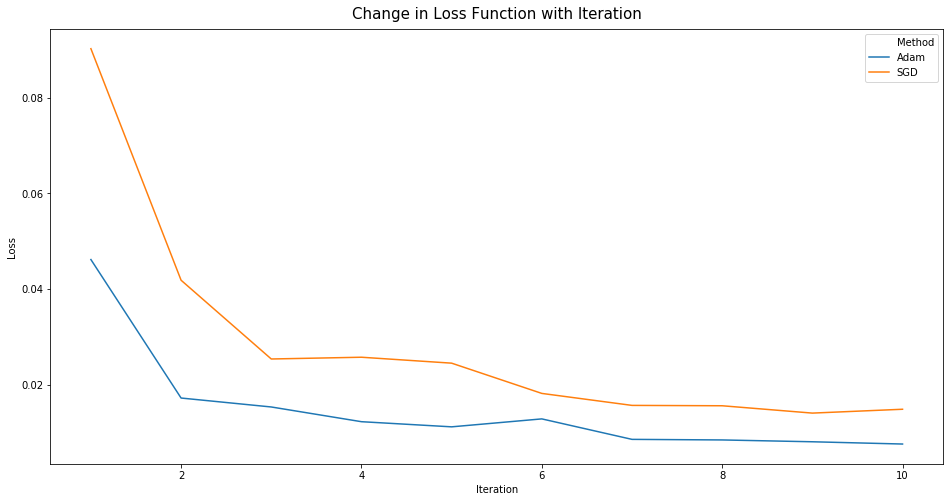

In [122]:
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Change in Loss Function with Iteration', fontsize=15, pad=10) 
#---------------------Title of the chart


sns.lineplot(x=resultsDf_temp['Iteration'],y=resultsDf_temp['Log Loss'],hue=resultsDf_temp['Method']);


ax.set(xlabel='Iteration', ylabel='Loss');

***Identify the Method with minimum error and maximum accuarcy. Use the resultsDF_temp to identify the Method***

In [123]:
resultsDf_temp[resultsDf_temp['Log Loss']==resultsDf_temp['Log Loss'].min()]

,Iteration,Method,Accuracy,Log Loss
0,10,Adam,0.998947,0.007637


In [124]:
resultsDf_temp[resultsDf_temp['Accuracy']==resultsDf_temp['Accuracy'].max()]

,Iteration,Method,Accuracy,Log Loss
0,10,Adam,0.998947,0.007637


#### Optional - Hyper Parameter Tuning with Keras Tuner

In the segment below, we will take a look at how different hyper parameters can be tuned using Kerastune.
Since it is difficult to identify the optimum number of neurons we can hyper tune them along with the type of optimizer.

In [ ]:
# !pip install -q -U keras-tuner (install using prompt)

In [ ]:
import kerastuner as kt

In [ ]:
def model_builder(hp):
  
    model = Sequential(layers=None, name=None)
    
    hp_units = hp.Int('units', min_value = 1, max_value = 30, step = 1)
    
    model.add(Dense(hp_units, input_shape = (29,), activation = 'tanh'))
#     model.add(Dense(5, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
  
    # Tune the learning rate for the optimizer 
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
     #optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
#     'adam', 'sgd', 'rmsprop'

#     
    model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = hp_learning_rate), loss = 'binary_crossentropy', metrics=['accuracy'])
  
    return model

In [ ]:
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [ ]:
# MAX_TRIALS = 20
# EXECUTIONS_PER_TRIAL = 5

# tuner = kt.RandomSearch(model_builder,
#     objective='val_accuracy',
#     max_trials=MAX_TRIALS,
#     executions_per_trial=EXECUTIONS_PER_TRIAL,
#     directory='test_dir',
#     project_name='tune_optimizer',
#     seed=7
# )

In [ ]:
# tuner.search_space_summary()

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro')

In [ ]:
tuner.search(X_train, y_train.values, batch_size = 200, epochs = 10, validation_split=0.20, callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
tuner.oracle.get_best_trials()[0].hyperparameters.values

In [ ]:
model = Sequential(layers=None, name=None)
model.add(Dense(9, input_shape = (29,), activation = 'tanh'))
# model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
mod.fit(X_train, y_train.values, batch_size = 700, epochs = 10, verbose = 0)
results = mod.evaluate(X_test, y_test.values, verbose=0)

In [ ]:
results